In [2]:
import src.gen_synthetic as gen_data
import matplotlib.pyplot as plt
import numpy as np
from scipy.fft import fft, fftfreq
from scipy.signal import detrend
from scipy import stats
import src.onlineSLE as utility
import os


## Reproduct Figure 1

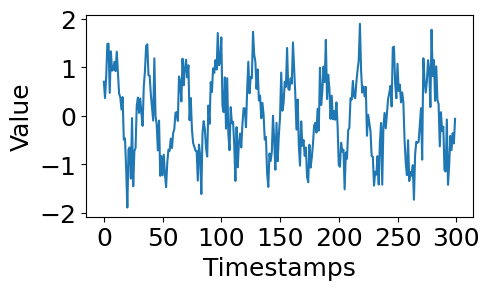

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 640x480 with 0 Axes>

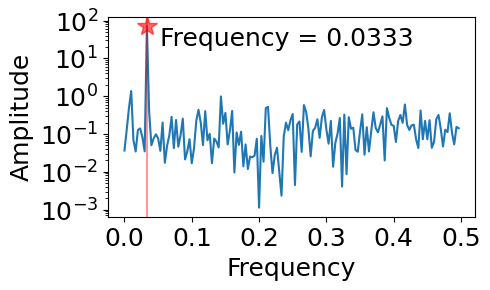

<Figure size 640x480 with 0 Axes>

In [3]:
np.random.seed(0)
ts = np.array(gen_data.sinewave(300,30,1))
R_t = 0.4 * np.random.randn(len(ts))
ts= R_t + ts


## Periodogram using FFT
start_fft = fft(ts)
xfreq, pden = utility.peridogram(len(ts),start_fft)
max_idx = np.argmax(pden)
max_idx = np.argmax(pden)


plt.figure(figsize=(5,3))
plt.plot(ts)
plt.xlabel('Timestamps', fontsize=18)
plt.ylabel('Value', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.tight_layout()
plt.savefig('Fig1a.eps' ,format='eps')
plt.show()
plt.clf()

plt.figure(figsize=(5,3))
plt.semilogy(xfreq, pden)
plt.plot(xfreq[max_idx], pden[max_idx], 'r*', markersize=15, alpha = 0.6)
plt.axvline(x=xfreq[max_idx], color = 'red', alpha= 0.4)
plt.text(xfreq[max_idx]+0.02, pden[max_idx]-50, f'Frequency = {xfreq[max_idx]:.4f}', fontsize=18)
plt.xlabel('Frequency', fontsize=18)
plt.ylabel('Amplitude', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.tight_layout()
plt.savefig('Fig1b.eps' ,format='eps')
plt.show()
plt.clf()


## Generate dataset and Figure 2.

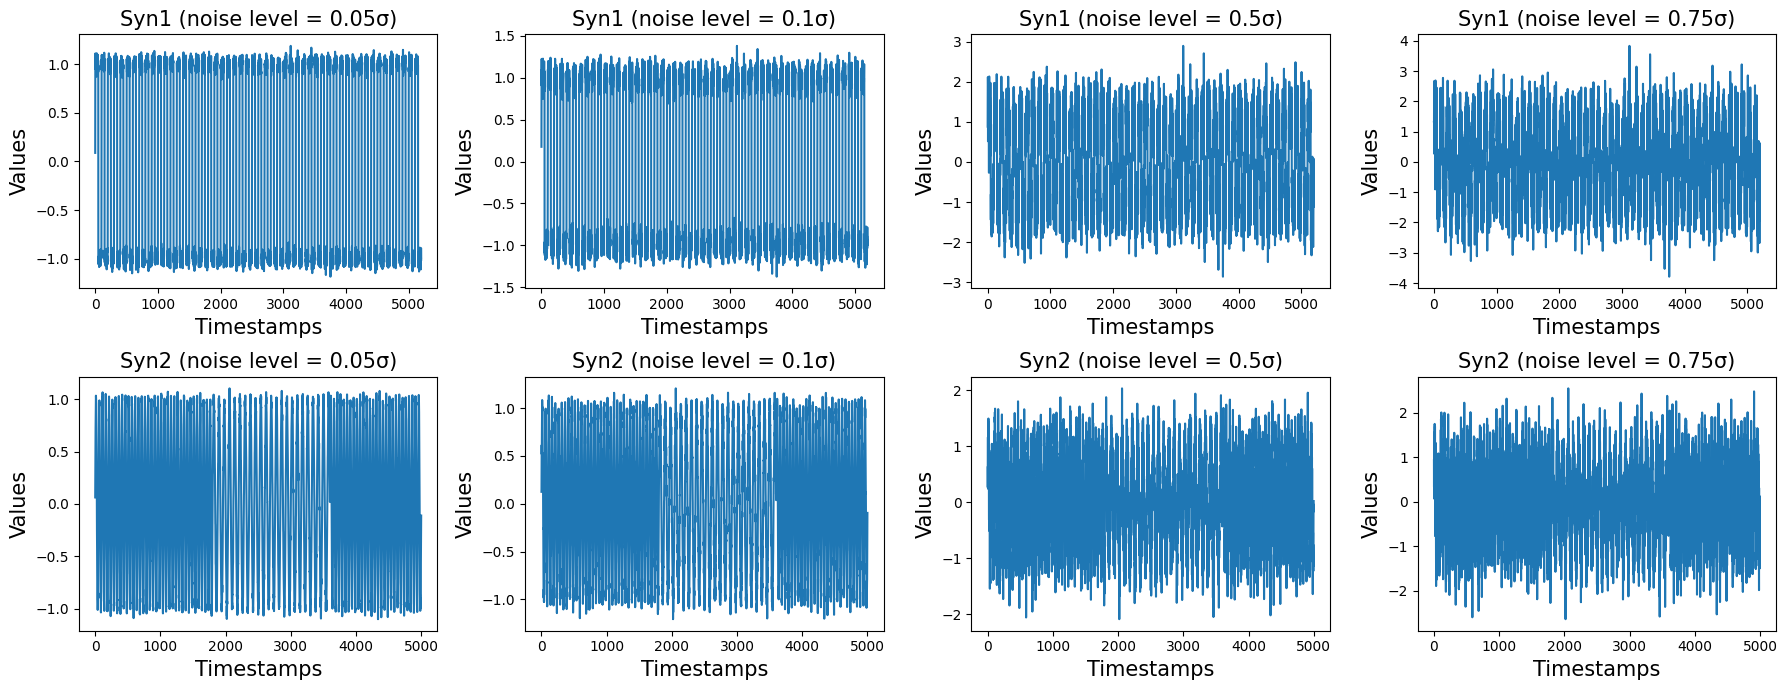

In [4]:

fig, axes = plt.subplots(2, 4, figsize=(18, 7))
axes = axes.flatten()
noise_levels = [0.05, 0.10, 0.50, 0.75, 0.05, 0.10, 0.50, 0.75]
for i in range(len(axes)):
    if i < 4:
        data = gen_data.generate_syn1(residual_rate=noise_levels[i], is_export=False)
        title = f'Syn1 (noise level = {noise_levels[i]}σ)'
    else:
        data = gen_data.generate_syn2(residual_rate=noise_levels[i], is_export=False)
        title = f'Syn2 (noise level = {noise_levels[i]}σ)'
    
    axes[i].plot(data['ts'])
    axes[i].set_title(title, fontsize=15)
    axes[i].set_xlabel('Timestamps', fontsize=15)
    axes[i].set_ylabel('Values', fontsize=15)

plt.tight_layout()

# Show the plots all dataset
plt.show()



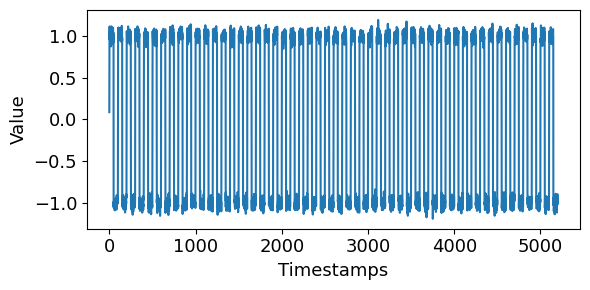

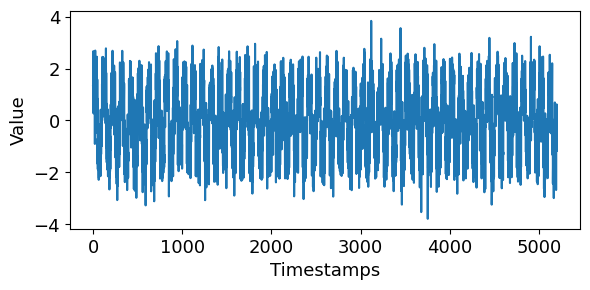

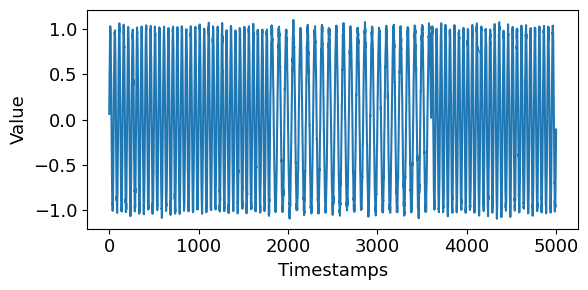

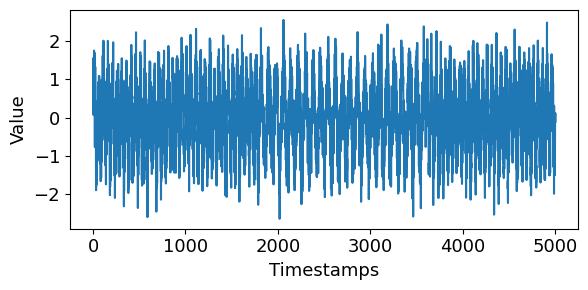

In [5]:
# Fig2a
data = gen_data.generate_syn1(residual_rate=0.05, is_export=False)
plt.figure(figsize=(6, 3))
plt.plot(data['ts'])
plt.xlabel('Timestamps', fontsize=13)
plt.ylabel('Value', fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.tight_layout()
plt.savefig('Fig2a.eps' ,format='eps')
plt.show()

# Fig2b
data = gen_data.generate_syn1(residual_rate=0.75, is_export=False)
plt.figure(figsize=(6, 3))
plt.plot(data['ts'])
plt.xlabel('Timestamps', fontsize=13)
plt.ylabel('Value', fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.tight_layout()
plt.savefig('Fig2b.eps' ,format='eps')
plt.show()

# Fig2c
data = gen_data.generate_syn2(residual_rate=0.05, is_export=False)
plt.figure(figsize=(6, 3))
plt.plot(data['ts'])
plt.xlabel('Timestamps', fontsize=13)
plt.ylabel('Value', fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.tight_layout()
plt.savefig('Fig2c.eps' ,format='eps')
plt.show()

# Fig2d
data = gen_data.generate_syn2(residual_rate=0.75, is_export=False)
plt.figure(figsize=(6, 3))
plt.plot(data['ts'])
plt.xlabel('Timestamps', fontsize=13)
plt.ylabel('Value', fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.tight_layout()
plt.savefig('Fig2d.eps' ,format='eps')
plt.show()

## ECG and ABP dataset (Figs 3-4)

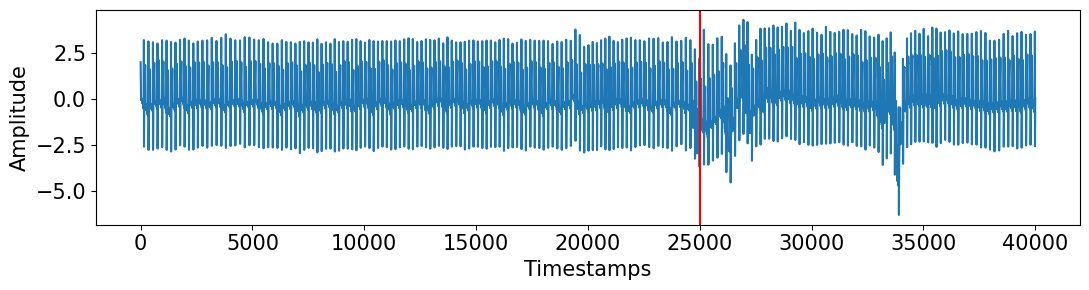

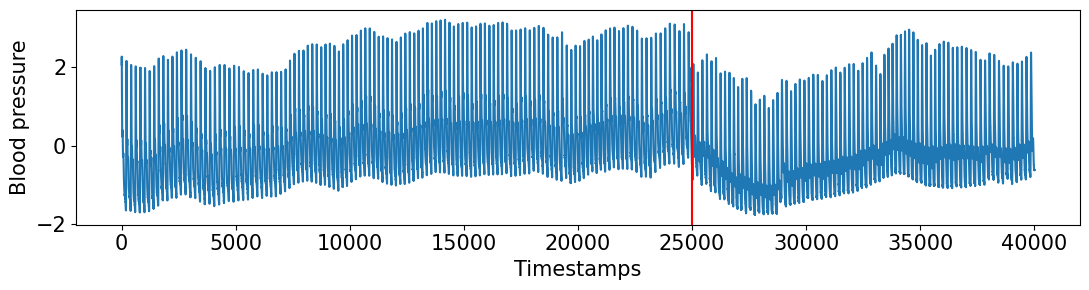

In [12]:
# please download dataset from https://sites.google.com/site/onlinesemanticsegmentation/ (Matrix Profile VIII)
full_path = os.path.expanduser("~/source_code/onlineSLE/dataset/")      

ecg_ts = np.loadtxt(os.path.join(full_path,'TiltECG_200_25000.txt'))
ecg_ts = detrend(ecg_ts)
ecg_ts = stats.zscore(ecg_ts)
plt.figure(figsize=(11,3))
plt.plot(ecg_ts)
plt.axvline(x=25000, color='r')
# plt.title('ECG dataset', fontsize=15)
plt.xlabel('Timestamps', fontsize=15)
plt.ylabel('Amplitude', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()
plt.savefig('Fig3a.eps' ,format='eps')
plt.show()

abp_ts = np.loadtxt(os.path.join(full_path,'TiltABP_210_25000.txt'))
abp_ts = detrend(abp_ts)
abp_ts = stats.zscore(abp_ts)
plt.figure(figsize=(11,3))
plt.plot(abp_ts)
plt.axvline(x=25000, color='r')
# plt.title('ABP dataset', fontsize=15)
plt.xlabel('Timestamps', fontsize=15)
plt.ylabel('Blood pressure', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()
plt.savefig('Fig3b.eps' ,format='eps')
plt.show()


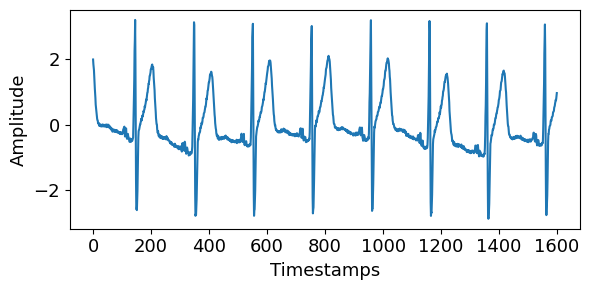

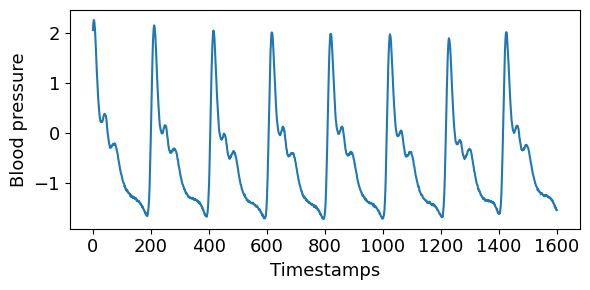

In [9]:
plt.figure(figsize=(6,3))
plt.plot(ecg_ts[:1600])
# plt.title('ECG dataset', fontsize=15)
plt.xlabel('Timestamps', fontsize=13)
plt.ylabel('Amplitude', fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=13)
# plt.xlim(0,1600)
plt.tight_layout()
plt.savefig('Fig4a.eps' ,format='eps')
plt.show()


plt.figure(figsize=(6,3))
plt.plot(abp_ts[:1600])
# plt.title('ABP dataset', fontsize=15)
plt.xlabel('Timestamps', fontsize=13)
plt.ylabel('Blood pressure', fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=13)
# plt.xlim(0,1600)
plt.tight_layout()
plt.savefig('Fig4b.eps' ,format='eps')
plt.show()